# Credit Card Fraud Detection Project

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. 

The dataset contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the owners of the dataset cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

Feature **'Time'** contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature **'Amount'** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

- Link to the dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# Setting params for plots
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

## Obtaining

In [3]:
# Loading in dataset into a dataframe
df = pd.read_csv('../../../data/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploring

In [5]:
# Viewing the number of columns and rows within the dataset
print(f"Credit Card Fraud Detection Dataset:\nrows: {df.shape[0]}\ncolumns: {df.shape[1]}")

Credit Card Fraud Detection Dataset:
rows: 284807
columns: 31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

At first glance, it seems we do not have any rows with null information. 

In [7]:
fraud = df['Class'].value_counts()[1]
true = df['Class'].value_counts()[0]
print(f"Percentage of fraudulent transactions: {round(fraud/len(df) * 100, 3)}%\n"
      f"Percentage of non-fraudulent transactions: {round(true/len(df) * 100, 3)}%")

Percentage of fraudulent transactions: 0.173%
Percentage of non-fraudulent transactions: 99.827%


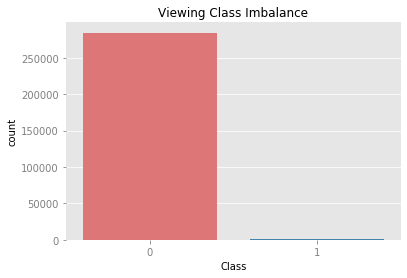

In [8]:
ax = sns.countplot(x='Class', data=df)
ax.set_title('Viewing Class Imbalance');

There is extreme class imbalance between the two classes. Remember that the number of fraudulent transactions within this dataset is 492, which accounts for only 0.173% of all the data.

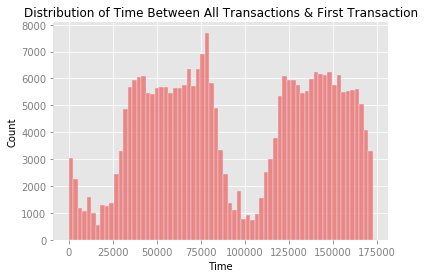

In [9]:
ax = sns.histplot(data=df, x='Time')
ax.set_title('Distribution of Time Between All Transactions & First Transaction');

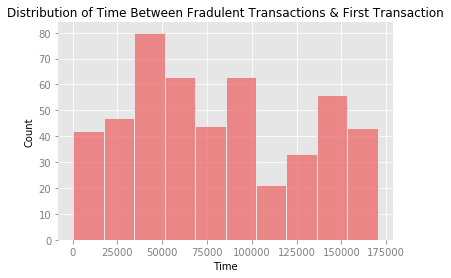

In [10]:
ax = sns.histplot(data=df[df['Class'] == 1], x='Time')
ax.set_title('Distribution of Time Between Fradulent Transactions & First Transaction');

In [11]:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [12]:
n_sec_per_day = 86400

df['Time'].max() / n_sec_per_day

1.9999074074074075

We see that the time column contains around 285,000 transactions by looking at the 'count' row. By taking the maximum value of the time column and dividing it by the number of seconds in a day, we can see that all transactions within this dataset occurred within 2 days.

#### Creating an 'Hours' column

We are going to create a new column called **'Hours'** that tells us what hour the transaction happened in military time.

In [36]:
def make_hours(num):
    val = round((num / n_sec_per_day * 24)) 
    if val > 24:
        val = val - 24
    return val

In [37]:
apply_hours = df['Time'].apply(make_hours)
df['Hours'] = apply_hours

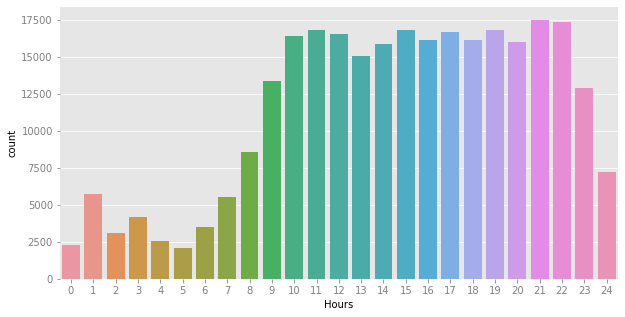

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(x='Hours', data=df);

In [41]:
df['Hours'].value_counts()

21    17482
22    17310
11    16799
15    16798
19    16779
17    16641
12    16502
10    16408
16    16150
18    16112
20    15999
14    15851
13    15019
9     13368
23    12893
8      8584
24     7206
1      5721
7      5530
3      4194
6      3465
2      3117
4      2521
0      2261
5      2097
Name: Hours, dtype: int64

In [23]:
val = round((df['Time'].iloc[-1] / n_sec_per_day * 24)) 
if val > 24:
    val = val - 24


48

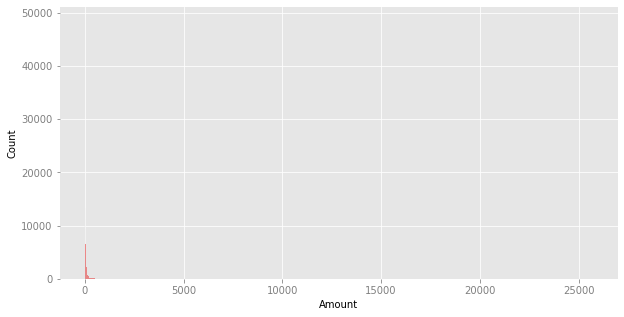

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(df['Amount']);

## Citations

1. Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015


2. Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon


3. Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE


4. Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)


5. Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier


6. Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing


7. Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019


8. Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019